3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Stm
5           + + +     + +   +   + + + + +     +     + +     + + 
4 +     + +         +     +   +           + +   + +       + 
3     + 
2   +             +                                     + 
1 
  5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 
  0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 
  1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 




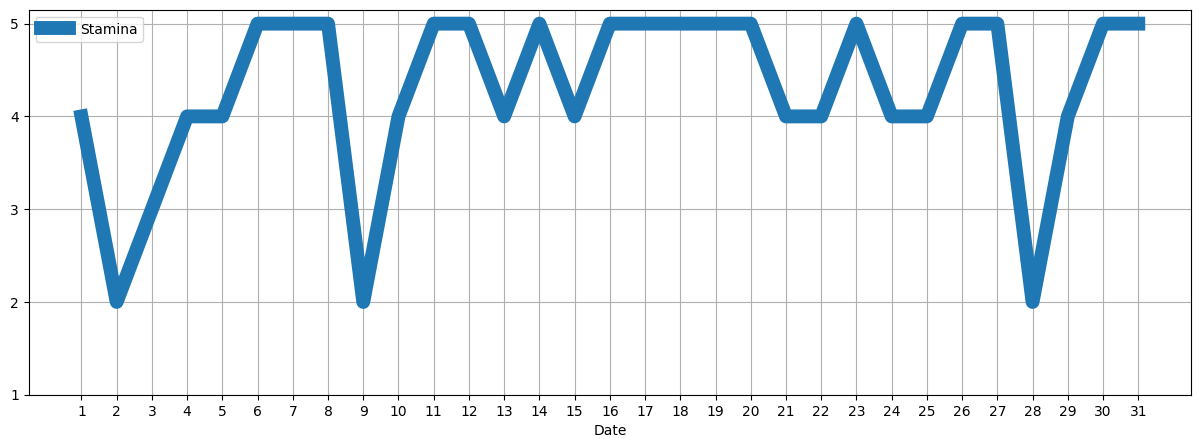

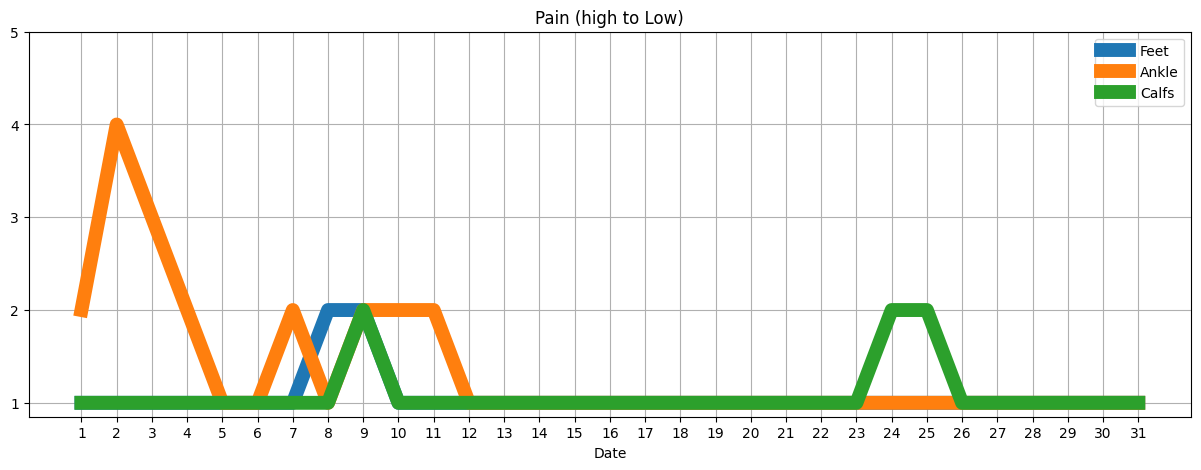

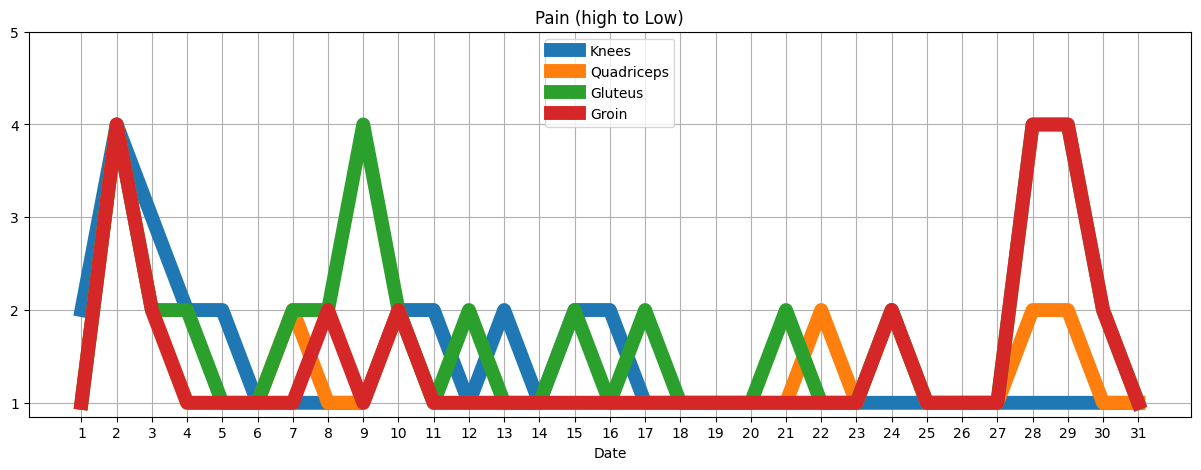

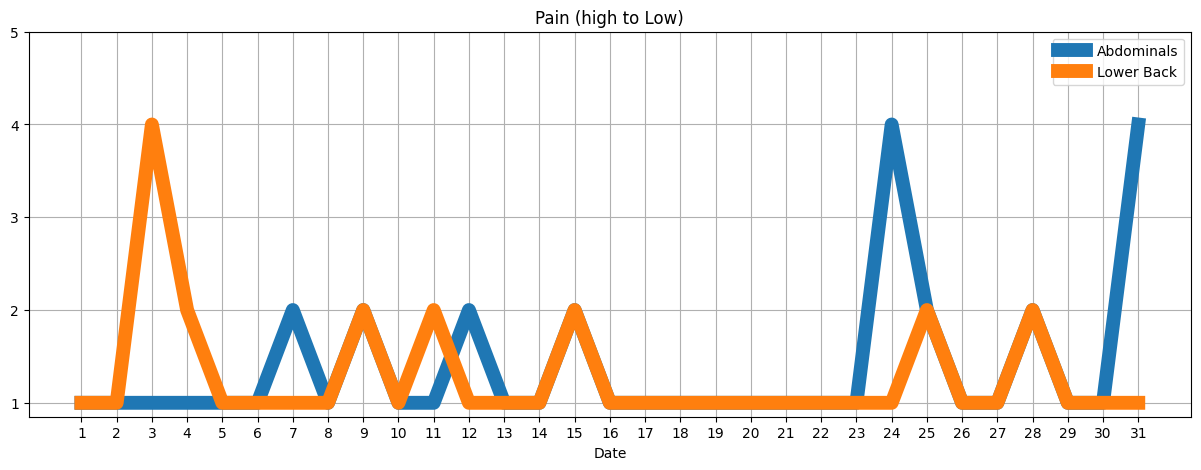

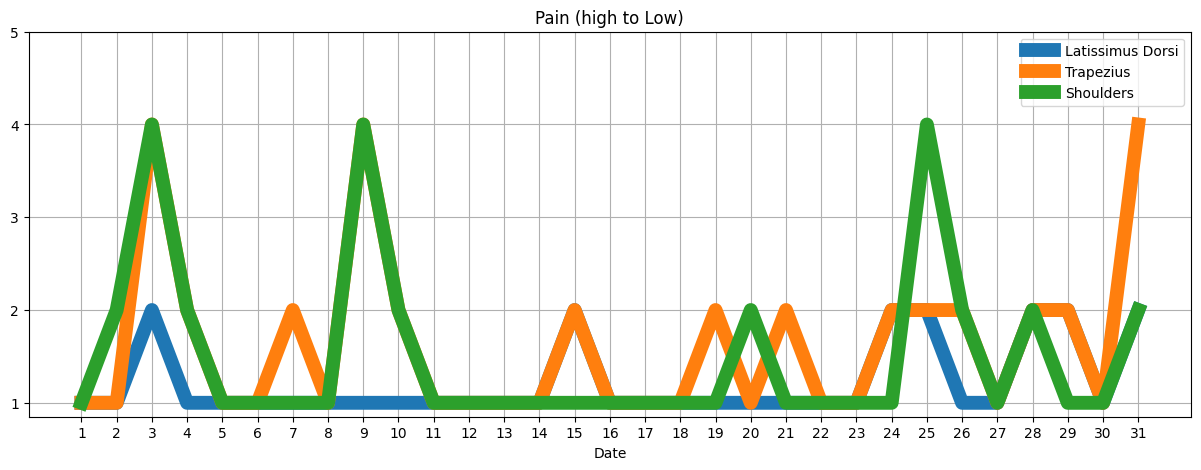

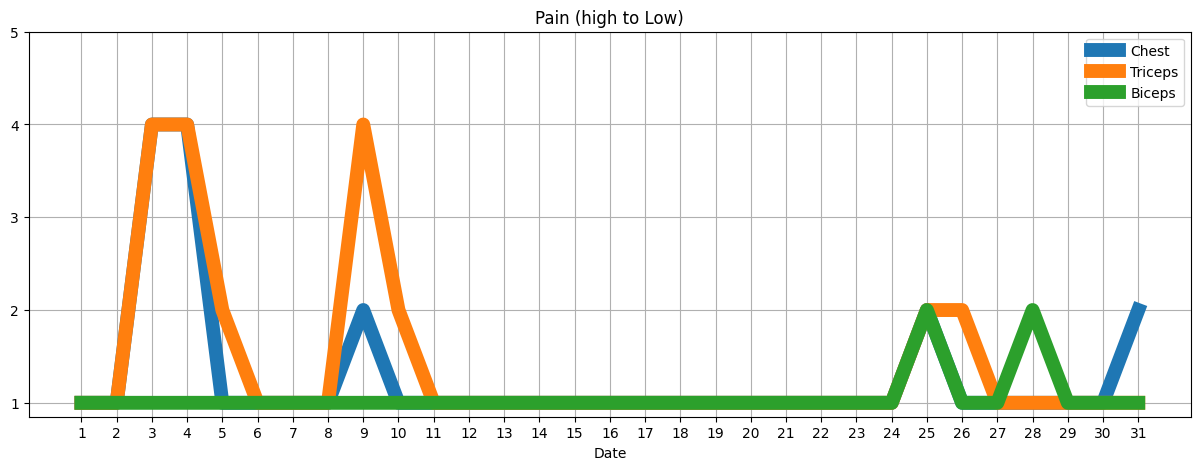

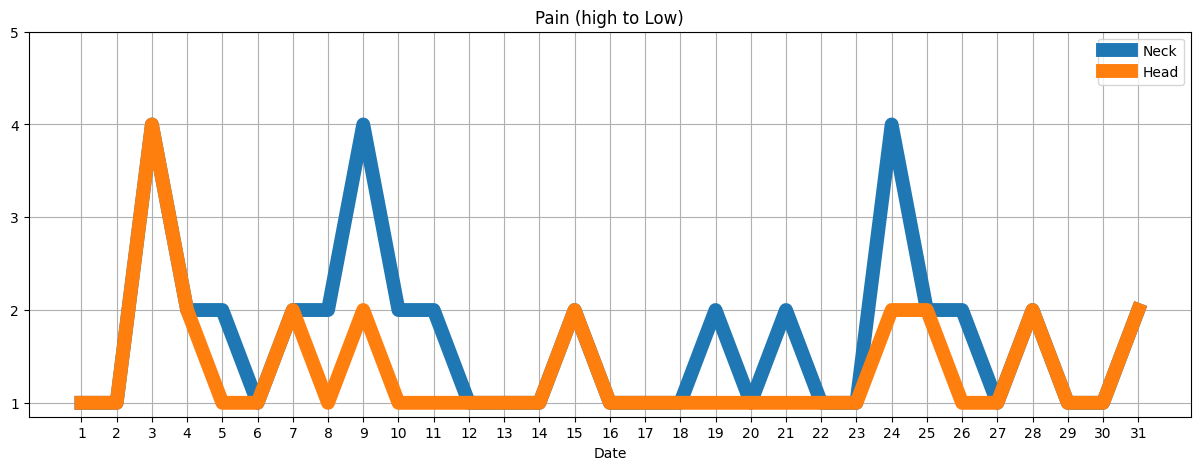

In [3]:
# List of primary issues
# todo    description                                   hours   progress      Note
# todo0   A0/1.csv skate, long, downhill, juggling,
#         running duration per day, overall mean.
# todo1   A0/1.csv longboard distance, running
#         distance per day, overall mean
# todo2   P0.csv observations, ARIMA (after todo3),     10       Processing    Made multi line graph
#         mean in each category.
# todo3   p1 observations, manual prediction, ARIMA,
#         mean in each category.
# todo4   B01.csv calories, salt, fat, protein, carb,
#         alc each day, overall mean.
# todo5   B01 weather summary, OS PRISM, exercise
#         intensity.
# todo6   B01 moving window correlation between
#         exercise and ___.
#         (calorie, real weather, alcohol)
# todo7   B01 moving window spearman correlation
#         between todo0 duration and pain, calories
#         burned. duration and nutrients. real and
#         summary weather. pain and real weather.
#         pain and summary weather. ???.
# todo8   tbd data filling idk if thats another
#         chapter or avoided.
#
# Time spent at a computer programming
# Total estimate  :
# Total actual    :
#
# Summary
# asdfasdf
#
# Start date: 20250125
# End date:

# There is an exhaustive list of statistics and excessive secondary issues.

# List of secondary issues
# todo   description                              progress
# todo0  ?

import sys
import matplotlib.pyplot as plt
#from datetime import datetime
print(sys.version)
# 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]

##############################################################################
# Part A: CSV parser class to open the file and parse the values into a list #
##############################################################################
class CSV_Parser:
  # Initialize the input variables
  def __init__(self, data_path):
    self.data_path = data_path
  def file_opener(self):
    with open(self.data_path, "r") as data_open:
      data_read = data_open.read()
      return data_read
  # Index the commas and line breaks
  def comma_index(self, open_file, column_len):
    data_comma_place = [0]
    column_pl_len = 0
    for i in range(len(open_file)):
      data1_col1 = open_file[i]
      if data1_col1 == ",":
        data_comma_place.append(i)
        data_comma_place.append(i+1)
      if data1_col1 == "\n":
        data_comma_place.append(i)
        data_comma_place.append(i+1)
        # If you want to use the function to get the column width, set to 1
        if column_len == 1:
          col_width = len(data_comma_place)
          return col_width
          break
    las_val = data_comma_place[-1] + 2
    data_comma_place.append(las_val)
    return data_comma_place
  # Splitting the csv characters into list of words based on indexed comma position
  def csv_value_list(self, data_comma_out, open_file, col_width, col_head):
    j = col_head
    data_val_list = []
    for i in range(len(data_comma_out)):
      if j >= len(data_comma_out):
        break
      comma_strt = data_comma_out[j]
      j += 1
      comma_end = data_comma_out[j]
      #print(comma_strt, "and ", comma_end)
      j += 1
      data_val_list.append(open_file[comma_strt:comma_end])
      j = j + (col_width * 2)
    return data_val_list
  # Flipping the columns from high to low for readability
  # If the original value was 5, set it to equal 0 (no pain)
  # If the original value was 0, set it to equal to 5 (high pain) etc.
  # If none of those things are true, append the string (for the column header)
  def csv_flipper(self, csv_list, col_width):
    csv_flipped = []
    for i in csv_list:
      if i == str(5):
        n = str(1)
        csv_flipped.append(n)
      elif i == str(4):
        n = str(2)
        csv_flipped.append(n)
      elif i == str(3):
        n = str(3)
        csv_flipped.append(n)
      elif i == str(2):
        n = str(4)
        csv_flipped.append(n)
      elif i == str(1):
        n = str(5)
        csv_flipped.append(n)
      else:
        csv_flipped.append(i)
    return csv_flipped

######################################################
# Part B: Get descriptive statistics of each column. #
######################################################
class Statistics:
  # Initialize the input variables
  def __init__(self, P0_flipped, P0_col_width, B0_list, B0_col_width):
    self.P0_flipped = P0_flipped
    self.P0_col_width = P0_col_width
    self.B0_list = B0_list
    self.B0_col_width = B0_col_width
  # Returns a dictionary with the header and mean
  def mu(self, col_list):
    total = 0
    for i in col_list[1:]:
      total = total + float(i)
    mean = total / (len(col_list) - 1)
    header_mean = [col_list[0], mean]
    return header_mean
  # Returns the 2-4 moment of the distribution
  def mnt(self, header, mean, col_list):
    col_1 = len(col_list) - 1
    stn = 0
    skew = 0
    kurt = 0
    for i in col_list[1:]:
      n1 = int(i) - mean
      n1_sqr = n1 ** 2
      n1_cube = n1 ** 3
      n1_quad = n1 ** 4
      stn = stn + n1_sqr
      skew = skew + n1_cube
      kurt = kurt + n1_quad
    stn_small_sqr = float(stn) / float(col_1)
    stn_small = stn_small_sqr ** .5
    skew_small_sqr = float(skew) / float(col_1)
    skew_small = skew_small_sqr / (stn_small ** 3)
    kurt_small_sqr = float(kurt) / float(col_1)
    kurt_small = kurt_small_sqr / (stn_small ** 4)
    return [header, stn_small, skew_small, kurt_small]
  # Covariance and correlation
  def covar(self, x_mean, y_mean, col_1_list, col_2_list):
    col_len = len(col_1_list) - 1
    covar = 0
    x1y1_sum = 0
    for i in range(col_len):
      # print("x_mean: ", x_mean[1], "x_value: ", col_1_list[i+1])
      x1 = float(col_1_list[i+1]) - x_mean[1]
      y1 = float(col_2_list[i+1]) - y_mean[1]
      x1y1 = x1 * y1
      x1y1_sum = x1y1_sum + x1y1
    covar = x1y1_sum / col_len
    return covar
  def cor(self, covar, col_1_stnd, col_2_stnd):
    stnd12 = col_1_stnd * col_2_stnd
    cor = covar / stnd12
    return cor
  def rsquared(self):
    return
  # Current footage of events could be upscaled or downscaled in pixel resolution
  # to resemble old or new footage. Applications include recycle old footage
  # of games that had very few viewers or convincing the viewer that they were
  # in a repeating simulation or crazy.
  def upsampling (self):
    return
  def downsampling (self):
    return
  def feature_extraction(self):
    return
  def chi_squared(self):
    return
  def pearson_chi_squared(self):
    return
  # https://www.ibm.com/docs/en/db2woc?topic=procedures-statistics-parametric-nonparametric
  def student_t_test(self):
    return
  # Non-parametric are used for Descrete variables. Discrete random variables
  # are used for experiments such as flipping a coin or rolling a six-sided die.
  # Variable is countable. They are for smaller numbers of data.
  # https://libanswers.lib.miamioh.edu/stats-faq/faq/343628
  def pearson_chi_ind(self):
    return
  def mann_whitney_wilcox(self):
    return
  def spearmann_rank_cor(self):
    return
  # https://www.ibm.com/docs/en/db2woc?topic=procedures-statistics-parametric-nonparametric
  def wilcox_paired_sample(self):
    return
  # Test is the non-parametric equivilent of the parametric one way ANOVA test
  def kruskal_wallis_friedman(self):
    return

  # Other statistics for predicitons and large datasets

  # Measures distance to mean to cluster data
  def k_means_cluster(self):
    return
  # k-nearest neighbors memorizes dataset and make predictions - probably computationally expensive
  def k_nearest_neighbor(self):
    return
  # Predictor with no iterative learning -> https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote05.html
  def naive_bayes(self):
    return
  # Feature reduction technique for large datasets
  def pca(self):
    return

######################################################
# Part C: Data visualization with a timeseries graph #
######################################################
# 'Graph' class accepts three variables: verticle arranged 'data',
# the date column'date_col_num', and the data column 'data_col_num'
class Graph:
  # Initialize the input variables
  def __init__(self, data, date_col_num, data_col_num):
    self.data = data
    self.date_col_num = date_col_num
    self.data_col_num = data_col_num
  def hi_lo(self, data_col_num):
    # The date and date column to be used
    data_col = self.data[data_col_num]
    data_col_len = len(data_col)
    # High and low of values
    hi_lo_count = 1
    hi = data_col[1]
    lo = data_col[1]
    for e in range(len(data_col[1:])):
      hi_lo_count += 1
      if hi_lo_count == (len(data_col[1:]) + 1):
        break
      if hi < data_col[hi_lo_count]:
        hi = data_col[hi_lo_count]
      if lo > data_col[hi_lo_count]:
        lo = data_col[hi_lo_count]
    return [hi, lo]
  def binned(self, hi_lo):
    # high value (5 in this case or hi_lo[0])
    # The date and date column to be used
    # TODO it works but is not resuable for other data ranges
    date_col = self.data[self.date_col_num]
    data_col = self.data[self.data_col_num]
    data_col_len = len(data_col)
    fiver = []
    fourer = []
    threer = []
    twoer = []
    oner = []
    lol_stm_date = []
    counter = 1
    # Binned with date value
    for i in range(data_col_len):
      P0_column = self.data[self.data_col_num]
      if counter == len(self.data[0]):
        break
      if float(P0_column[counter]) == 5:
        fiver.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 4:
        fourer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 3:
        threer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 2:
        twoer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 1:
        oner.append([date_col[counter], P0_column[counter]])
      counter += 1
    # Combining the binned data into one dictionary
    lol_date_stm = [fiver, fourer, threer, twoer, oner]
    return lol_date_stm

  def time_series(self, date_hi_lo, lol_date_stm):
    date_col = self.data[self.date_col_num]
    # Base of the month, plus 00 i.e. 500
    date_base = int(date_hi_lo[1]) - 1
    # The number of spaces is the 'day' (date - month) - 'prev_day_space_int'
    # The difference between the values is multiplied by ' ' for each 5,4,3,2,1
    # Value with a '+' character marking the position
    spacer = []
    prev_day_space_int = 0
    for i in lol_date_stm:
      spacer_mid = []
      for ii in i:
        day = int(ii[0]) - date_base
        day_count = day - prev_day_space_int
        day_space_str = ((day_count-1)*2) * " "
        spacer_mid.append(day_space_str)
        prev_day_space_int = day
      prev_day_space_int = 0
      spacer.append(spacer_mid)
    y_val = [y for y in range(len(spacer),0,-1)]
    return [spacer, y_val]
  def time_series_print(self,spacer,y_val):
    date_col = self.data[self.date_col_num]
    for j,k in zip(spacer,y_val):
      # y values
      print(k,end=" ")
      for l in j:
        print(l,end="")
        print("+",end=" ")
      print()
    # x values
    for m in range(len(date_col[0])-1):
      print("  ",end="")
      for n in date_col[1:]:
        print(n[m], end=" ")
      print()
    return
  def time_series_write(self,header,txt_out,spacer,y_val):
    # Open the output file location and write data to the txt
    date_col = self.data[self.date_col_num]
    file_output = open(txt_out, "w")
    file_output.write(header)
    file_output.write("\n")
    file_output.write("\n")
    # y values
    for j,k in zip(spacer,y_val):
      file_output.write(str(k) + " ")
      for l in j:
        file_output.write(str(l))
        file_output.write("+" + " ")
      file_output.write("\n")
    # x values
    for m in range(len(date_col[0])-1):
      file_output.write("  ")
      for n in date_col[1:]:
        file_output.write(str(n[m]) + " ")
      file_output.write("\n")
    file_output.close()
    return

  # Matplotlib for color because otherwise you would have
  # to write hardware code to avoid using Python or C libraries.
  # Object https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py
  def rgb_timeseries_bar(self,title_full):
    #date_col = self.data[self.date_col_num]
    date_col = self.data[0]
    data_col = self.data[self.data_col_num]
    # Skipping the first text value
    dist0 = [int(x)+1 for x in date_col[1:]]
    dist1 = [int(y) for y in data_col[1:]]
    plt.bar(dist0, dist1, width=0.8, align='edge')
    if title_full == 'March Stamina':
      plt.title(title_full + " (High to Low)")
    else:
      plt.title(title_full + " Pain (High to Low)")
    plt.xticks(dist0,
               #rotation=75,
               )
    plt.margins()
    plt.yticks(range(1,6))
    figure_dim = [5,15]
    plt.grid()
    plt.xlabel("Date")
    plt.rcParams['figure.figsize'] = [figure_dim[1], figure_dim[0]]
    plt.show()
    return
  def rgb_timeseries_scatter(self,title_full):
    #date_col = self.data[self.date_col_num]
    date_col = self.data[0]
    data = self.data
    # Skipping the first text value in date column
    dist0 = [int(x)+1 for x in date_col[1:]]
    # secondary todo: name instead of number position
    # Uses the position of each body part name in the list
    data_groups_num = [3,4,7,11,13,16,19,21]
    j = 1
    # Adding multiple lines to a single plot by group with formatting
    for i in range(len(data_groups_num)):
      subset0 = data_groups_num[i:j][0]
      if subset0 == data_groups_num[-1]:
        break
      subset1 = data_groups_num[i+1:j+1][0]
      data_groups = data[subset0:subset1]
      # First 3 columns in data are ID, while the title list isn't.
      # Subtract each subset by 3
      title_group = title_full[(subset0-3):(subset1-3)]
      # Create the plot
      fig, ax = plt.subplots()
      if title_group[0] == 'Stamina':
        pass
      else:
        plt.title("Pain (high to Low)")
      j += 1
      # Plot each line from the group and add to legend
      m = 0
      for k in data_groups:
        # Skipping the first text value in pain column
        dist1_group = [int(y) for y in k[1:]]
        ax.plot(dist0, dist1_group, label=title_group[m], linewidth=10)
        ax.legend()
        m += 1
      # Plot formatting
      plt.margins()
      plt.xticks(dist0)
      plt.yticks(range(1,6))
      plt.xlabel("Date")
      plt.grid()
      figure_dim = [5,15]
      plt.rcParams['figure.figsize'] = [figure_dim[1], figure_dim[0]]
      plt.show()
    return
def rgb_timeseries(self):
    # plt.ylabel("Pain", rotation=0, labelpad=15)
    #plt.figure(figsize=(figure_dim[0], figure_dim[1]))
    # plt.ylabel("Pain", rotation=0, labelpad=15)
    # plt.figure(figsize=(figure_dim[0], figure_dim[1]))
    # plt.title(title_group[0] + " (High to Low)")
    '''
    Figure reference.
    https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py

    Interesting album cover.
    https://matplotlib.org/stable/gallery/animation/unchained.html#sphx-glr-gallery-animation-unchained-py

    Ball kick physics kind of.
    https://matplotlib.org/stable/gallery/animation/double_pendulum.html#sphx-glr-gallery-animation-double-pendulum-py

    Animation Updates
    Bayes
    https://matplotlib.org/stable/gallery/animation/bayes_update.html#sphx-glr-gallery-animation-bayes-update-py

    Histogram
    https://matplotlib.org/stable/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py

    Ticks
    https://matplotlib.org/stable/gallery/animation/animate_decay.html#sphx-glr-gallery-animation-animate-decay-py

    Save as gif
    https://matplotlib.org/stable/gallery/animation/simple_scatter.html#sphx-glr-gallery-animation-simple-scatter-py

    Heart rate monitor animation.
    https://matplotlib.org/stable/gallery/animation/strip_chart.html#sphx-glr-gallery-animation-strip-chart-py

    Heat map to display each value in Chapter 11 for style consistency.
    https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

    Compare means and correlation could use heat map or this box plot.
    https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py

    A line chart over time with a range of colors between lines. Would that imply interpolation between each day when values change: https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html#sphx-glr-gallery-lines-bars-and-markers-multicolored-line-py

    Multiple lines same graph.
    https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html#sphx-glr-gallery-style-sheets-fivethirtyeight-py

    Multiple histograms on the same graph? You could group body areas. Might be useful for the comparison section.
    https://matplotlib.org/stable/gallery/style_sheets/bmh.html#sphx-glr-gallery-style-sheets-bmh-py

    '''
    return

# Part A: The path of the CSV to be parsed
# P0.csv contains the pain scale and B0.csv contains the food records
P0_path, B0_path = "/content/P0.csv", "/content/B0.csv"
# Create the CSV_Parser class object and open the files
P0_Parser, B0_Parser = CSV_Parser(P0_path), CSV_Parser(B0_path)
P0_read, B0_read = P0_Parser.file_opener(), B0_Parser.file_opener()
# Index the comma position from the CSV and split the characters into their values
P0_comma_indexed, B0_comma_indexed = P0_Parser.comma_index(P0_read, 0), B0_Parser.comma_index(B0_read, 0)
# Get the width of columns of the commas
P0_comma_width, B0_comma_width = P0_Parser.comma_index(P0_read, 1), B0_Parser.comma_index(B0_read, 1)
# Sort the list into verticle columns
# The P0 csv gets flipped, except for the Stm column
# Divide by two - the list of comma places is doubled for the start/end value
P0_col_width = int(((P0_comma_width - 1 ) / 2) - 1)
# Divide by two - the list of comma places is doubled for the start/end value
B0_col_width = int(((B0_comma_width - 1 ) / 2) - 1)
P0_vert = []
B0_vert = []
# List of columns to not be flipepd
unflipped_col = ['ID','Date','Day','Stm']
for i in range(0,P0_comma_width-1,2):
  P0_list = P0_Parser.csv_value_list(P0_comma_indexed, P0_read, P0_col_width, i)
  if P0_list[0] in unflipped_col:
    P0_vert.append(P0_list)
  else:
    P0_flip = P0_Parser.csv_flipper(P0_list, P0_col_width)
    P0_vert.append(P0_flip)
for j in range(0,B0_comma_width-1,2):
  B0_list = B0_Parser.csv_value_list(B0_comma_indexed, B0_read, B0_col_width, j)
  B0_vert.append(B0_list)

# Part B: Get descriptive statistics
stats_class = Statistics(P0_vert, P0_col_width, B0_vert, B0_col_width)
# The first three columns are skipped because they are ID, Date, and Day
# These two loops calculate the means and moments
P0_means_list = []
P0_stnd_list = []
B0_means_list = []
B0_stnd_list = []
for l in stats_class.P0_flipped[3:]:
  P0_means = stats_class.mu(l)
  P0_means_list.append(P0_means)
  P0_mnt2_4 = stats_class.mnt(P0_means[0],P0_means[1],l)
  P0_stnd_list.append(P0_mnt2_4[1])
for m in stats_class.B0_list[3:]:
  B0_means = stats_class.mu(m)
  B0_means_list.append(B0_means)
  B0_mnt2_4 = stats_class.mnt(B0_means[0],B0_means[1],m)
  B0_stnd_list.append(B0_mnt2_4[1])
# The nested loops calculates the covariance and correlations between B0 and P0
for n in range(len(stats_class.P0_flipped[3:])):
  #print("x: ", stats_class.P0_flipped[o+3][0])
  for o in range(len(stats_class.B0_list[3:])):
    #print("    and ", stats_class.B0_list[p+3][0])
    P0B0_covar = stats_class.covar(P0_means_list[n],B0_means_list[o],stats_class.P0_flipped[n+3],stats_class.B0_list[o+3])
    P0B0_cor = stats_class.cor(P0B0_covar,P0_stnd_list[n],B0_stnd_list[o])
    #print(P0B0_cor)
  #print()

# Part C: Data visualization
graph_count = 3
title_full = ['Stamina',
              'Feet','Ankle','Calves',
              'Knees','Quadriceps','Gluteus','Groin',
              'Abdominals','Lower Back',
              'Latissimus Dorsi','Trapezius','Shoulders',
              'Chest','Triceps','Biceps',
              'Neck','Head']

title_month = ['March']

for p in stats_class.P0_flipped[3:]:

  if graph_count == 4:
    break

  # Initialize graph class
  P0_graph = Graph(P0_vert, 1, graph_count)

  # ASCII Graphs
  # date_col_num = 1 # data_col_num = each successive column
  # this would be a loop over columns 3-20, 1st column is the date
  jpg_print = []
  print(p[0])
  # print()
  P0_hi_lo = P0_graph.hi_lo(graph_count)
  date_hi_lo = P0_graph.hi_lo(1)
  P0_binned = P0_graph.binned(P0_hi_lo)
  P0_time_series = P0_graph.time_series(date_hi_lo,P0_binned)
  P0_graph.time_series_print(P0_time_series[0],P0_time_series[1])
  # print("variable 'P0_rgb_graph':\n", P0_rgb_graph)
  # print()
  # P0_file_out = "/content/P0_" + p[0] + ".txt"
  # P0_time_series_write = P0_graph.time_series_write(p[0],P0_file_out,P0_time_series[0],P0_time_series[1])

  # RGB Bar Graph
  print("\n")
  # P0_rgb_bar_graph = P0_graph.rgb_timeseries_bar(title_month[0] + " " + title_full[graph_count-3])
  # RGB Scatter Graphs by Group
  graph_count += 1

P0_rgb_scatter = P0_graph.rgb_timeseries_scatter(title_full)

In [2]:
# Semi-retired code
'''
  # Index the commas and line breaks
  def comma_index(self, open_file, column_len):
    data_comma_place = []
    column_pl_len = 0
    for i in range(len(open_file)):
      data1_col1 = open_file[i]
      if data1_col1 == ",":
        data_comma_place.append(i)
      if data1_col1 == "\n":
        data_comma_place.append(i)
        # If you want to use the function to get the column width, set to 1
        if column_len == 1:
          data_comma_place = len(data_comma_place)
          print(data_comma_place)
          return data_comma_place
          break
    las_val = data_comma_place[-1] + 2
    data_comma_place.append(las_val)
    return data_comma_place

  # Get the width of the column
  # todo2 avoid repeated code
  def comma_width(self, open_file, column_len):
    data_comma_place = []
    column_pl_len = 0
    for i in range(len(open_file)):
      data1_col1 = open_file[i]
      if data1_col1 == ",":
        data_comma_place.append(i)
      if data1_col1 == "\n":
        data_comma_place.append(i)
        # If you want to use the function to get the column width, set to 1
        if column_len == 1:
          data_comma_place = len(data_comma_place)
          break
    return data_comma_place

  def aaaa(self, P0_flipped):
    space_holder = 0
    for j, k in zip(P0_flipped[1],P0_flipped[3]):
      char_len = len(j)
      space_holder = space_holder + char_len
      hed_spc = " " * space_holder
      print(hed_spc)

    for j in P0_flipped[1]:
      hed_spc = " " * len(j)
      # Prints the xy label
      if j == P0_flipped[1][0]:
        print("  ", end=" ")
      # This part makes the newline
      elif j == P0_flipped[1][col_len-1]:
        print("")
      # Prints the number of spaces held by date label (x variable)
      else:
        print(hed_spc, end =" ")
    # This is where the high low value would help
    for i in range(4,-1,-1):
      print(i+1)
      if i == (float(P0_flipped[0][1])):
        # Date column loop
        for j in P0_flipped[1]:
          if j == P0_flipped[1][0]:
            print("yx", end=" ")
          else:
            print(j, end =" ")
    return
'''

'\n  # Index the commas and line breaks\n  def comma_index(self, open_file, column_len):\n    data_comma_place = []\n    column_pl_len = 0\n    for i in range(len(open_file)):\n      data1_col1 = open_file[i]\n      if data1_col1 == ",":\n        data_comma_place.append(i)\n      if data1_col1 == "\n":\n        data_comma_place.append(i)\n        # If you want to use the function to get the column width, set to 1\n        if column_len == 1:\n          data_comma_place = len(data_comma_place)\n          print(data_comma_place)\n          return data_comma_place\n          break\n    las_val = data_comma_place[-1] + 2\n    data_comma_place.append(las_val)\n    return data_comma_place\n\n  # Get the width of the column\n  # todo2 avoid repeated code\n  def comma_width(self, open_file, column_len):\n    data_comma_place = []\n    column_pl_len = 0\n    for i in range(len(open_file)):\n      data1_col1 = open_file[i]\n      if data1_col1 == ",":\n        data_comma_place.append(i)\n      i